In [17]:
import torch
import torchvision
import torch.nn.functional as F
from torch import nn, optim
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #생성되는 이미지를 관찰하기 위함입니다. 3차원 플롯을 그리는 용도입니다.
from matplotlib import cm # 데이터포인트에 색상을 입히는 것에 사용됩니다.
import numpy as np
import tqdm

In [8]:
## 데이터 및 설정
EPOCH = 10
BATCH_SIZE = 64
device = "cuda" if torch.cuda.is_available() else "cpu"

# Fashion MNIST 데이터셋 불러오기 (학습데이터만 사용)
trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
    num_workers = 2
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



In [10]:
## 모델
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3),
        )

        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [13]:
autoEncoder = AutoEncoder().to(device)
optimizer = torch.optim.Adam(autoEncoder.parameters(), lr=0.005) 
criterion = nn.MSELoss()

In [18]:
view_data = trainset.data[:5].view(-1, 28*28)
view_data = view_data.type(torch.FloatTensor)/255. #픽셀의 색상값이 0~255이므로 모델이 인식하는 0부터 1사이의 값으로 만들기 위해 255로 나눠줍니다.

## 학습 함수
def train(autoEncoder, train_loader):
    iterator = tqdm.tqdm(train_loader)
    autoEncoder.train()
    
    for step, (x, label) in enumerate(train_loader):
        x = x.view(-1, 28*28).to(device)
        y = x.view(-1, 28*28).to(device) #x(입력)와 y(대상 레이블)모두 원본이미지(x)인 것을 주의해야 합니다.
        label = label.to(device)

        encoded, decoded = autoEncoder(x)

        loss = criterion(decoded, y) # decoded와 원본이미지(y) 사이의 평균제곱오차를 구합니다
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        iterator.set_description(f"epoch: {epoch+1}  loss: {loss.item()}")

epoch: 2  loss: 0.01875920407474041:   0%|                           | 0/938 [00:14<?, ?it/s]


[Epoch 1]


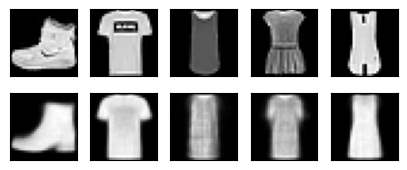

epoch: 3  loss: 0.019490359351038933:   0%|                          | 0/938 [00:14<?, ?it/s]


[Epoch 2]


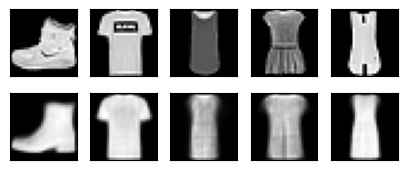

epoch: 4  loss: 0.023410996422171593:   0%|                          | 0/938 [00:14<?, ?it/s]


[Epoch 3]


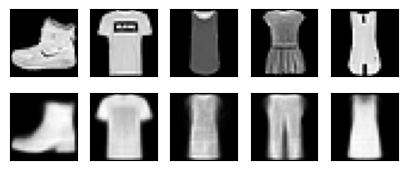

epoch: 5  loss: 0.02088901959359646:   0%|                           | 0/938 [00:13<?, ?it/s]


[Epoch 4]


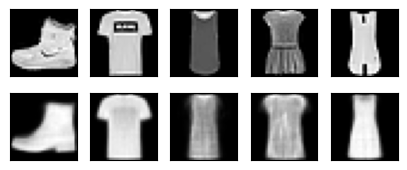

epoch: 6  loss: 0.019958660006523132:   0%|                          | 0/938 [00:14<?, ?it/s]


[Epoch 5]


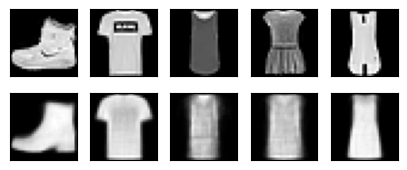

epoch: 7  loss: 0.019693320617079735:   0%|                          | 0/938 [00:13<?, ?it/s]


[Epoch 6]


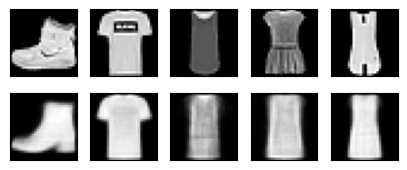

epoch: 8  loss: 0.025069111958146095:   0%|                          | 0/938 [00:14<?, ?it/s]


[Epoch 7]


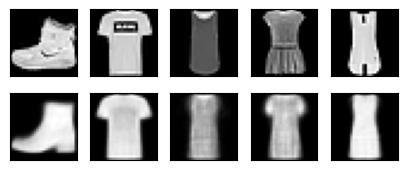

epoch: 9  loss: 0.021278653293848038:   0%|                          | 0/938 [00:14<?, ?it/s]


[Epoch 8]


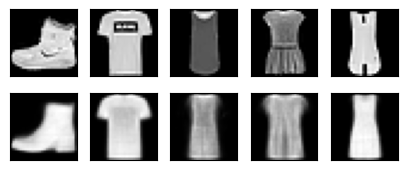

epoch: 10  loss: 0.022389406338334084:   0%|                         | 0/938 [00:13<?, ?it/s]


[Epoch 9]


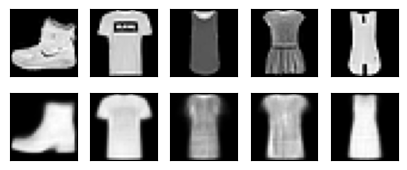

epoch: 11  loss: 0.01862146332859993:   0%|                          | 0/938 [00:13<?, ?it/s]


[Epoch 10]


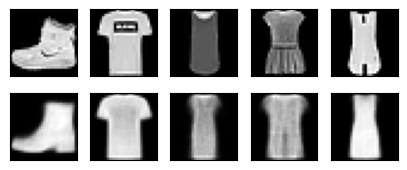

epoch: 12  loss: 0.021096404641866684:   0%|                         | 0/938 [00:13<?, ?it/s]


[Epoch 11]


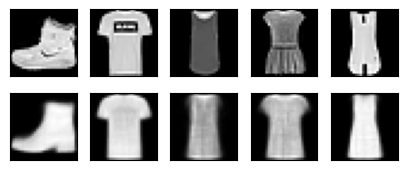

epoch: 13  loss: 0.01982036605477333:   0%|                          | 0/938 [00:13<?, ?it/s]


[Epoch 12]


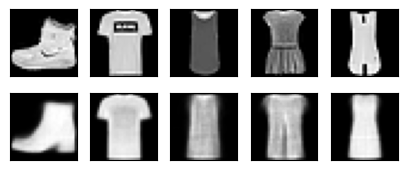

epoch: 14  loss: 0.022395724430680275:   0%|                         | 0/938 [00:13<?, ?it/s]


[Epoch 13]


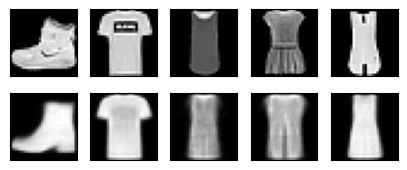

epoch: 15  loss: 0.019344383850693703:   0%|                         | 0/938 [00:13<?, ?it/s]


[Epoch 14]


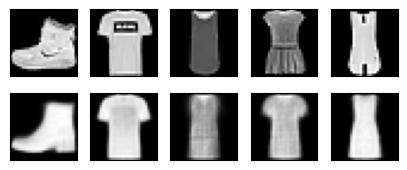

epoch: 16  loss: 0.022469576448202133:   0%|                         | 0/938 [00:13<?, ?it/s]


[Epoch 15]


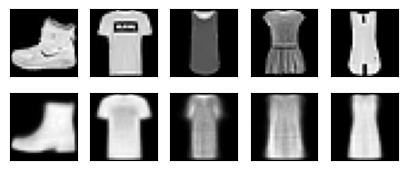

epoch: 17  loss: 0.023657817393541336:   0%|                         | 0/938 [00:13<?, ?it/s]


[Epoch 16]


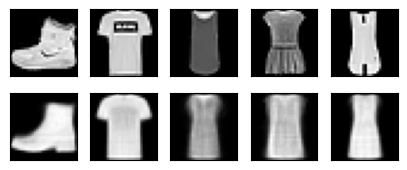

epoch: 18  loss: 0.021070359274744987:   0%|                         | 0/938 [00:13<?, ?it/s]


[Epoch 17]


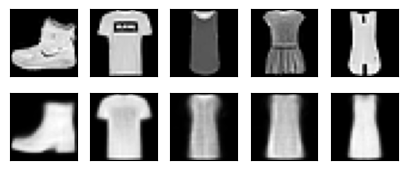

epoch: 19  loss: 0.02015462890267372:   0%|                          | 0/938 [00:13<?, ?it/s]


[Epoch 18]


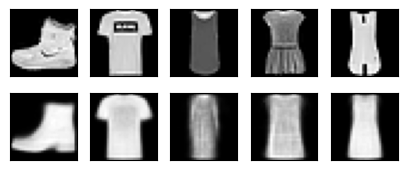

epoch: 20  loss: 0.023437103256583214:   0%|                         | 0/938 [00:13<?, ?it/s]


[Epoch 19]


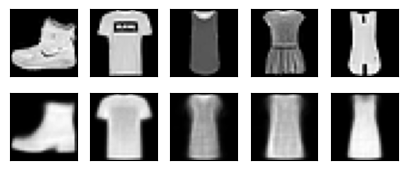

epoch: 21  loss: 0.019993267953395844:   0%|                         | 0/938 [00:13<?, ?it/s]


[Epoch 20]


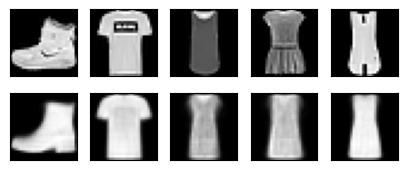

epoch: 22  loss: 0.023195570334792137:   0%|                         | 0/938 [00:13<?, ?it/s]


[Epoch 21]


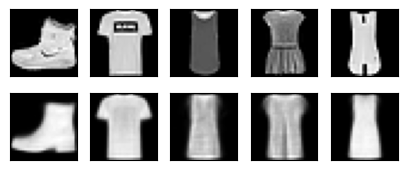

epoch: 23  loss: 0.025174465030431747:   0%|                         | 0/938 [00:13<?, ?it/s]


[Epoch 22]


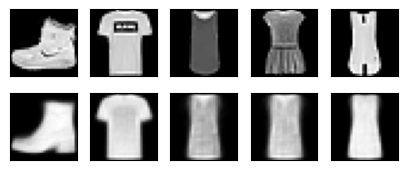

epoch: 24  loss: 0.020678507164120674:   0%|                         | 0/938 [00:14<?, ?it/s]


[Epoch 23]


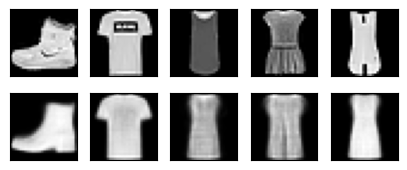

epoch: 25  loss: 0.02089802175760269:   0%|                          | 0/938 [00:13<?, ?it/s]


[Epoch 24]


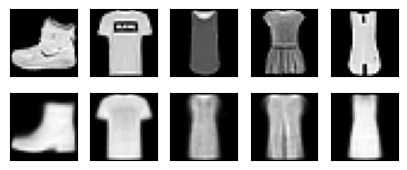

epoch: 26  loss: 0.019171664491295815:   0%|                         | 0/938 [00:13<?, ?it/s]


[Epoch 25]


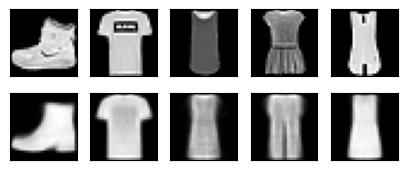

epoch: 27  loss: 0.01862034946680069:   0%|                          | 0/938 [00:13<?, ?it/s]


[Epoch 26]


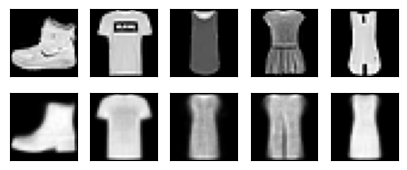

epoch: 28  loss: 0.022992555052042007:   0%|                         | 0/938 [00:14<?, ?it/s]


[Epoch 27]


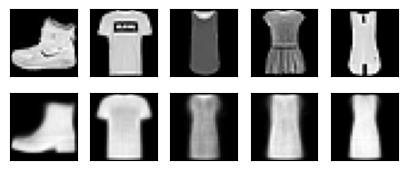

epoch: 29  loss: 0.01787557825446129:   0%|                          | 0/938 [00:14<?, ?it/s]


[Epoch 28]


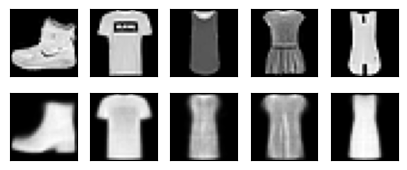

epoch: 30  loss: 0.020656254142522812:   0%|                         | 0/938 [00:13<?, ?it/s]


[Epoch 29]


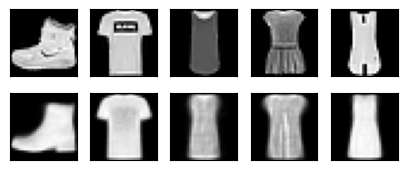

epoch: 31  loss: 0.015018205158412457:   0%|                         | 0/938 [00:13<?, ?it/s]


[Epoch 30]


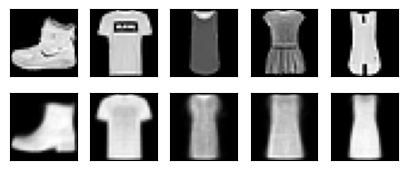

In [30]:
## 학습
for epoch in range(1, EPOCH+1):
    train(autoEncoder, train_loader)

    # 디코더에서 나온 이미지를 시각화 하기
    # 앞서 시각화를 위해 남겨둔 5개의 이미지를 한 이폭만큼 학습을 마친 모델에 넣어 복원이미지를 만듭니다.
    test_x = view_data.to(device)
    _, decoded_data = autoEncoder(test_x)

    # 원본과 디코딩 결과 비교해보기
    f, a = plt.subplots(2, 5, figsize=(5, 2))
    print("[Epoch {}]".format(epoch))
    for i in range(5):
        img = np.reshape(view_data.data.numpy()[i],(28, 28)) #파이토치 텐서를 넘파이로 변환합니다.
        a[0][i].imshow(img, cmap='gray')
        a[0][i].set_xticks(()); a[0][i].set_yticks(())

    for i in range(5):
        img = np.reshape(decoded_data.to("cpu").data.numpy()[i], (28, 28)) 
        # CUDA를 사용하면 모델 출력값이 GPU에 남아있으므로 .to("cpu") 함수로 일반메모리로 가져와 numpy행렬로 변환합니다.
        # cpu를 사용할때에도 같은 코드를 사용해도 무방합니다.
        a[1][i].imshow(img, cmap='gray')
        a[1][i].set_xticks(()); a[1][i].set_yticks(())
    plt.show()


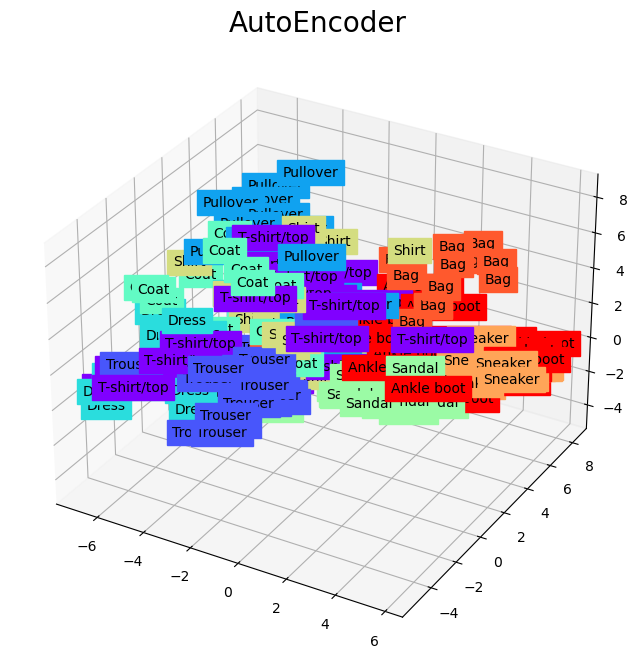

In [29]:
# 잠재변수를 3D 플롯으로 시각화
view_data = trainset.data[:200].view(-1, 28*28) #원본이미지 200개를 준비합니다
view_data = view_data.type(torch.FloatTensor)/255.
test_x = view_data.to(device)
encoded_data, _ = autoEncoder(test_x)
encoded_data = encoded_data.to("cpu")

CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("AutoEncoder", size = 20)

X = encoded_data.data[:, 0].numpy()
Y = encoded_data.data[:, 1].numpy()
Z = encoded_data.data[:, 2].numpy() #잠재변수의 각 차원을 numpy행렬로 변환합니다.

labels = trainset.targets[:200].numpy() #레이블도 넘파이행렬로 변환합니다.

for x, y, z, s in zip(X, Y, Z, labels): #zip()은 같은 길이의 행렬들을 모아 순서대로 묶어줍니다.
    name = CLASSES[s]
    color = cm.rainbow(int(255*s/9))
    ax.text(x, y, z, name, backgroundcolor=color)

ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())
plt.show()